In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')


In [2]:
stroke_df=pd.read_csv("C:\\Users\\prash\\OneDrive\\Desktop\\Projects\\Stroke-Prediction-Model-main\\healthcare-dataset-stroke-data.csv")

In [3]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_df = stroke_df.drop('id', axis=1)
stroke_df 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_df['smoking_status'].replace('Unknown',np.nan,inplace=True)

In [6]:
stroke_df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
5105   False  False         False          False         False      False   
5106   False  False         False          False         False      False   
5107   False  False         False          False         False      False   
5108   False  False         False          False         False      False   
5109   False  False         False          False         False      False   

      Residen

In [7]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)
stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0],inplace=True)

In [8]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le=LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)


In [10]:
for col in stroke_df.columns:
    stroke_df[str(col)]=label_encoded(stroke_df[str(col)])

gender ['Female' 'Male' 'Other']
age [8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 5.80e+01
 5.90e+01 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.60e+01
 6.70e+01 6.80e+01 6.90e+01 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01
 7.50e+01 7.60e+01 7.70e+01 7.80e+01 7.90e+01 8.00e+01 8.10e+01 8.20e+01]
hypertension 

In [11]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [12]:
stroke_False=stroke_df[stroke_df['stroke']==0]
stroke_False

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,24,0,0,0,4,0,1986,53,1,0
250,1,79,1,0,1,2,1,1604,266,1,0
251,0,29,0,0,0,2,1,2663,49,1,0
252,0,91,0,0,1,2,0,528,233,0,0
253,1,35,0,0,0,1,0,3340,64,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [13]:
stroke_True=stroke_df[stroke_df['stroke']==1]
stroke_True.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


In [14]:
print('people who have had a stroke in percentage',len(stroke_True)/len(stroke_df)*100,'%')

people who have had a stroke in percentage 4.87279843444227 %


<AxesSubplot: >

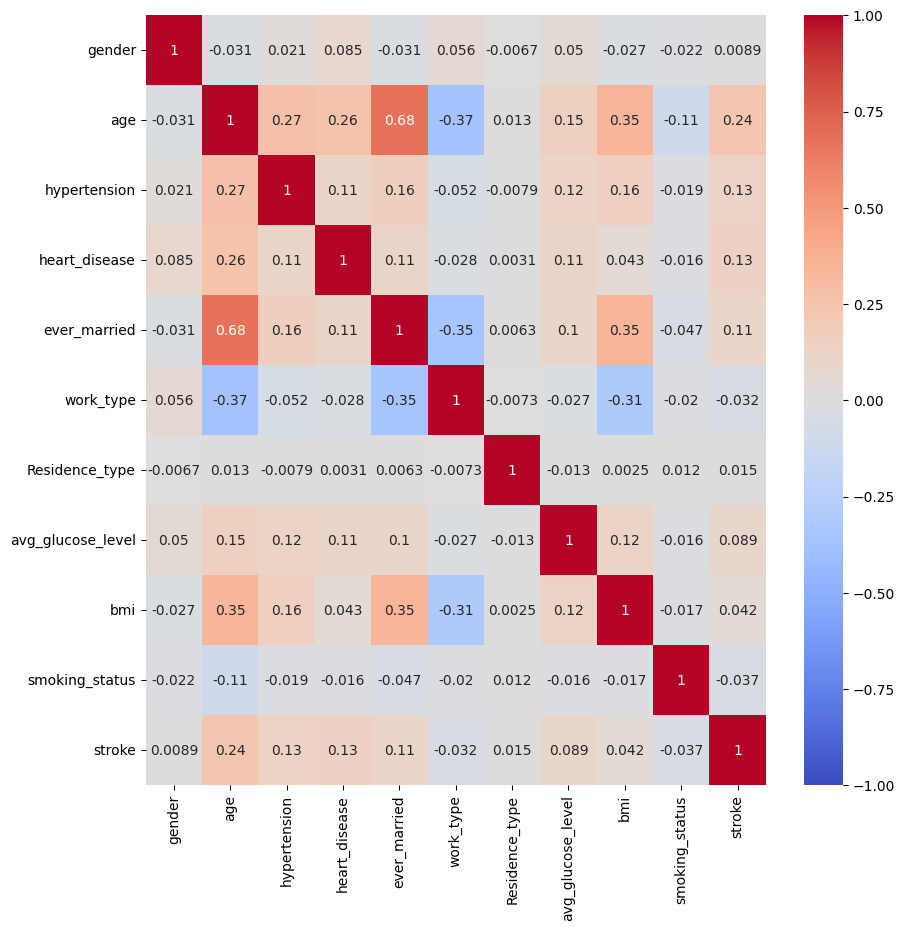

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(stroke_df.corr(),vmin=-1,cmap='coolwarm',annot=True)

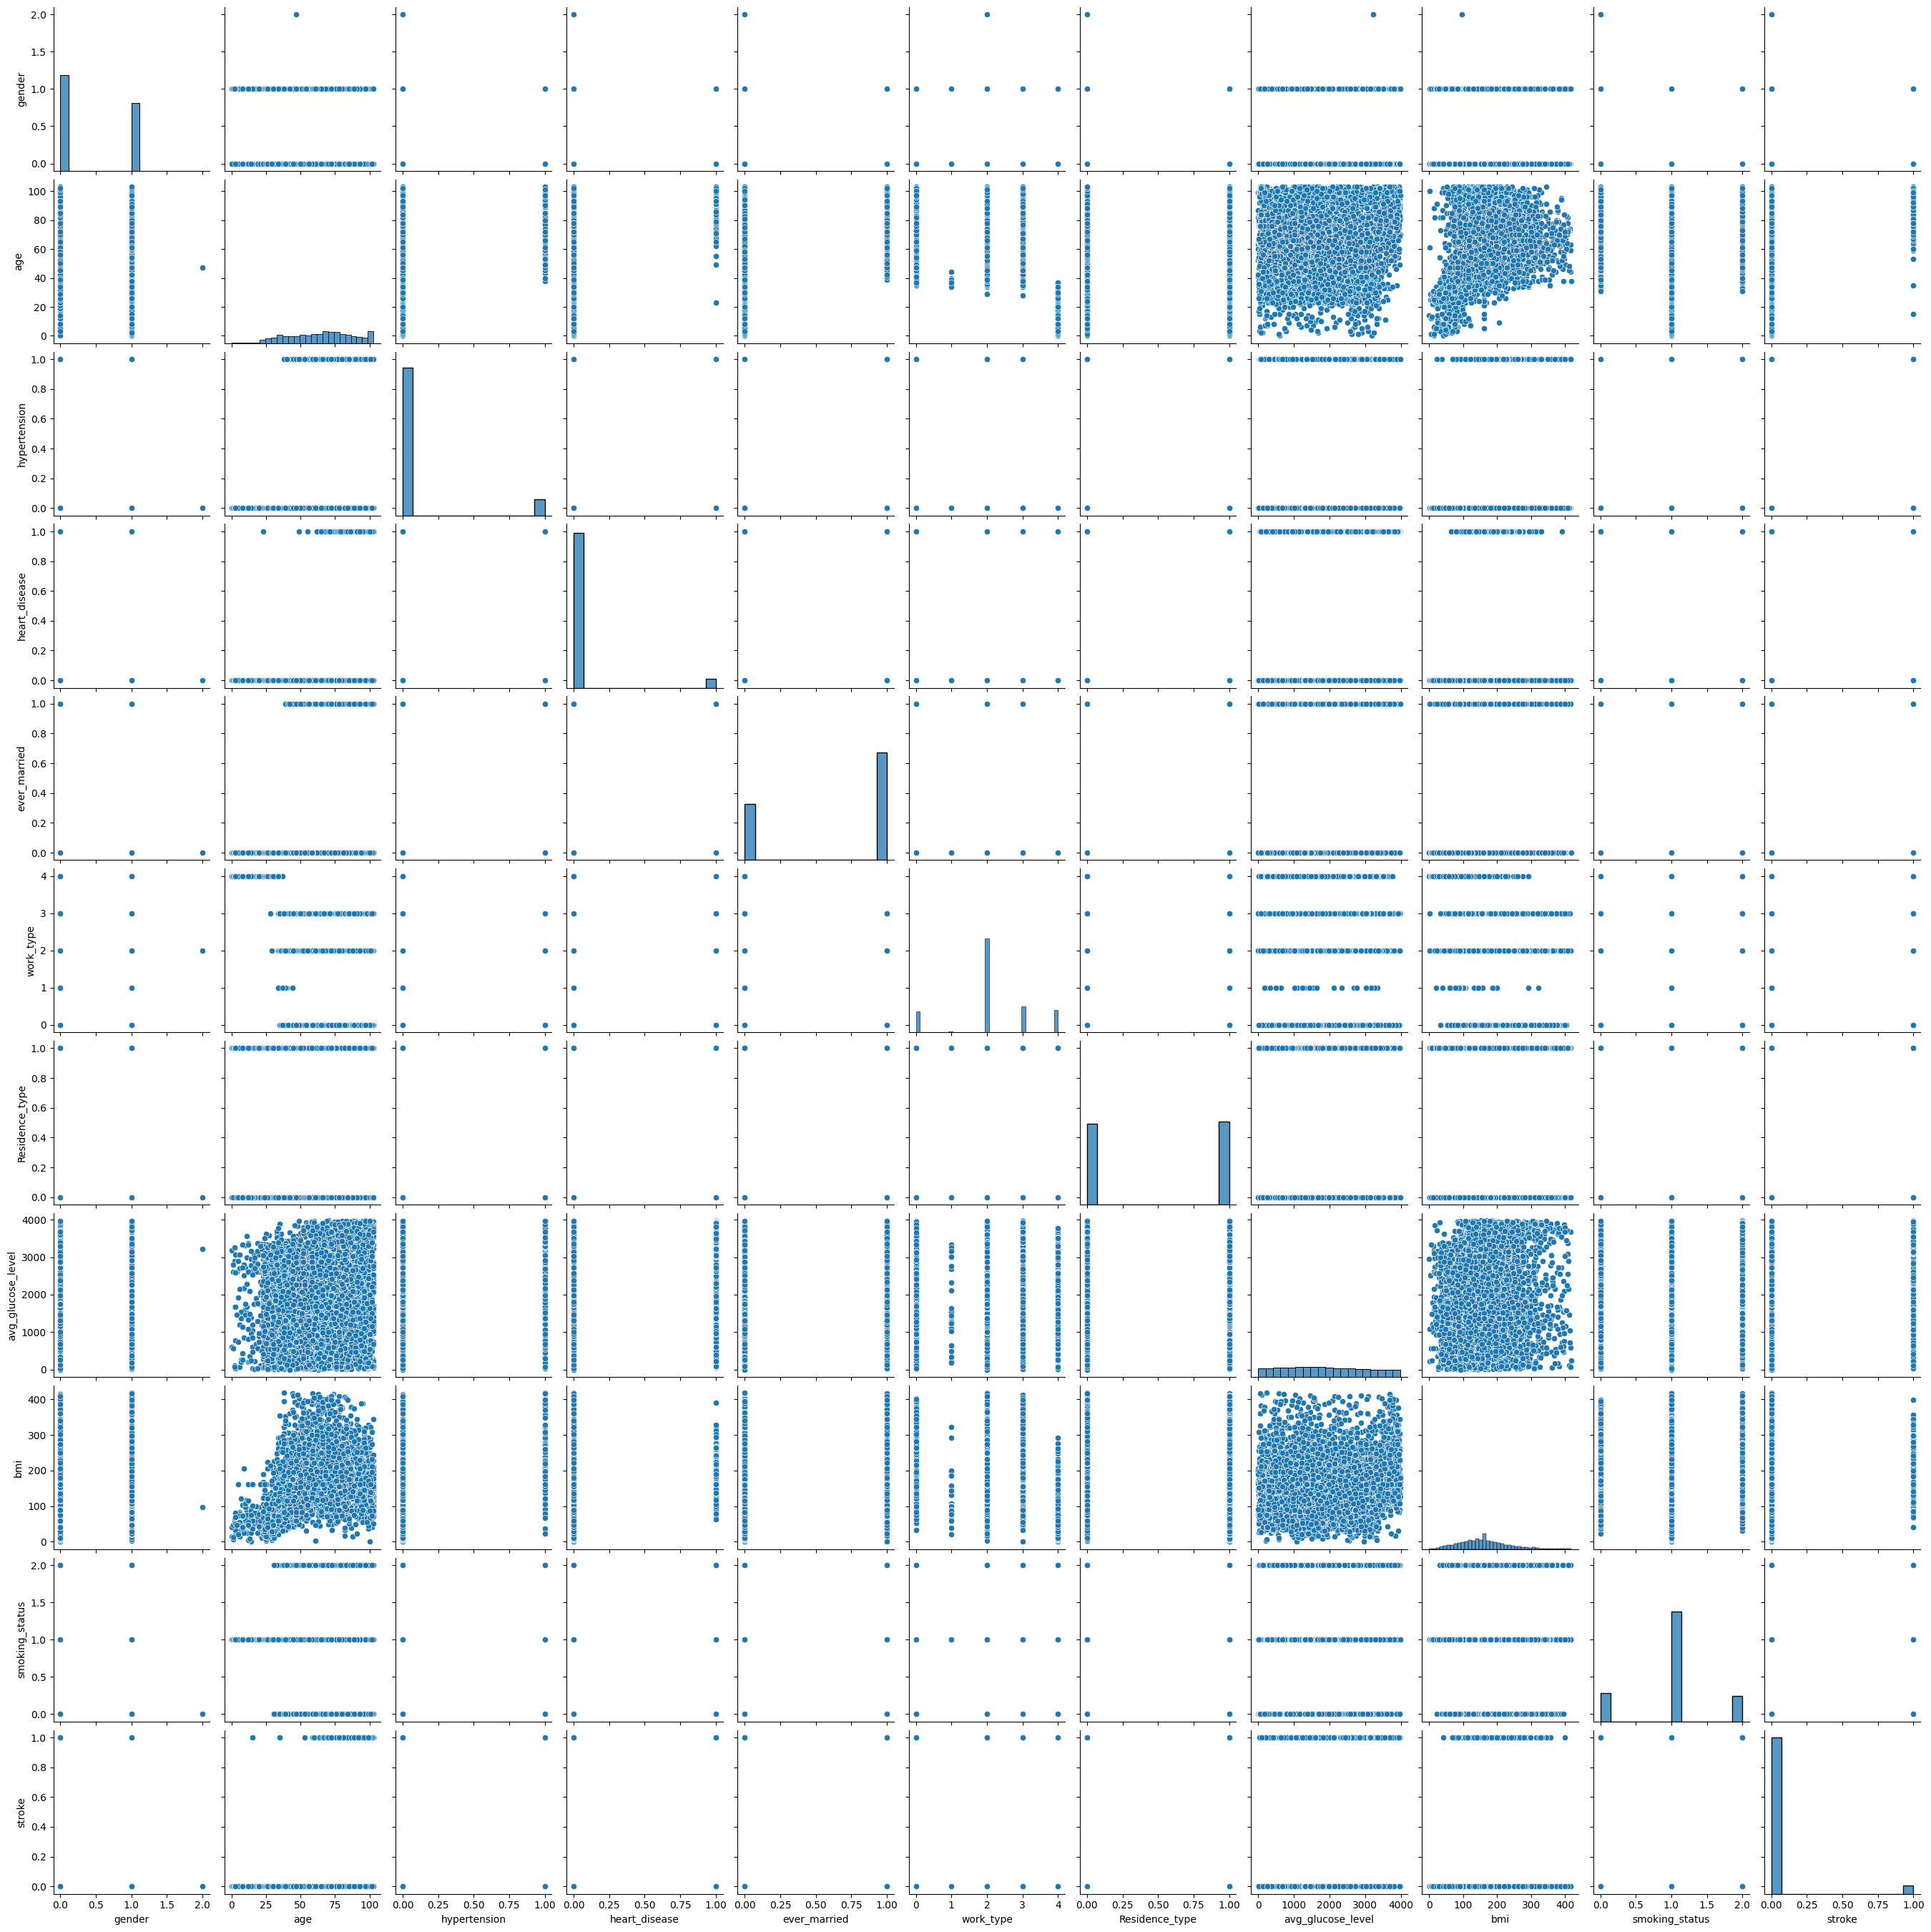

In [16]:
sns.pairplot(stroke_df)

In [17]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [18]:
X=stroke_df.drop(['stroke'],axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,0
1,0,82,0,0,1,3,0,3588,162,1
2,1,101,0,1,1,2,0,2483,199,1
3,0,70,0,0,1,2,1,3385,218,2
4,0,100,1,0,1,3,0,3394,113,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1
5106,0,102,0,0,1,3,1,3030,274,1
5107,0,56,0,0,1,3,0,1314,180,1
5108,1,72,0,0,1,2,0,3363,129,0


In [19]:
y=stroke_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
x_test.shape
y_test.shape

(1533,)

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
 #evaluating model

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_predict_test=decision_tree.predict(x_test)
y_predict_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
cm=confusion_matrix(y_test,y_predict_test)

[Text(0, 0.5, 'did not suffer stroke'), Text(0, 1.5, 'suffer stroke')]

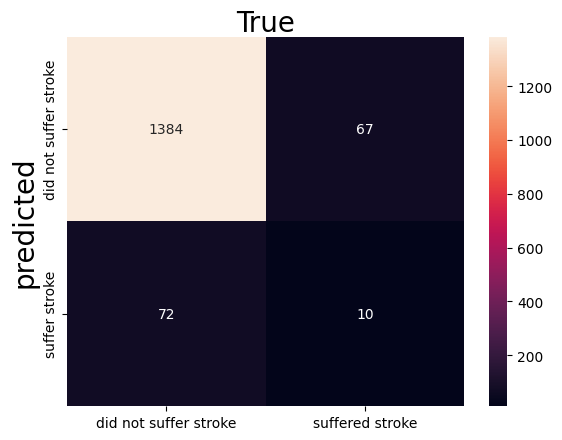

In [28]:
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='g')
ax.set_xlabel('True',fontsize=20)
ax.set_ylabel('predicted',fontsize=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticklabels(['did not suffer stroke','suffered stroke'],fontsize=10)
ax.yaxis.set_ticklabels(['did not suffer stroke','suffer stroke'],fontsize=10)

In [29]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1451
           1       0.13      0.12      0.13        82

    accuracy                           0.91      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.91      0.91      0.91      1533



NameError: name 'model' is not defined